In [27]:
import sirf.STIR as stir
import sirf.Reg as reg
import numpy as np
import os
import sys
# add the source directory to the path
# This is to make everything nice and self-contained
dir_path = os.path.dirname(os.getcwd())
source_path = os.path.join(dir_path, 'source')
sys.path.append(source_path)

from reconstruction.reconstruction import *
from reconstruction.registration import *
from reconstruction.osem import *
from plotting_functions import plot_2d_image

# and some additional functions for plotting
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import imageio
from plotting_functions import *
from IPython.display import Image

In [28]:
# First, let's get some template data
data_path = os.path.join(dir_path, 'data', 'template_data')
emission_image = stir.ImageData(os.path.join(data_path, 'emission.hv'))
attenuation_image = stir.ImageData(os.path.join(data_path, 'attenuation.hv'))
template_sinogram = stir.AcquisitionData(os.path.join(data_path, 'template_sinogram.hs'))


INFO: Setting energy window keys as in STIR3.0












Scanner parameters:= 
Scanner type := userdefined
Number of rings                          := 2
Number of detectors per ring             := 512
Inner ring diameter (cm)                 := 102
Average depth of interaction (cm)        := 0.7
Distance between rings (cm)              := 1.35
Default bin size (cm)                    := 0.3129
View offset (degrees)                    := 0
Maximum number of non-arc-corrected bins := 192
Default number of arc-corrected bins     := 192
Number of blocks per bucket in transaxial direction         := 1
Number of blocks per bucket in axial direction              := 1
Number of crystals per block in axial direction             := 1
Number of crystals per block in transaxial direction        := 8
Number of detector layers                                   := 1
Number of crystals per singles unit in axial direction      := 1
Number of crystals per singles unit in transaxial direction := 8
Scanner geometry (BlocksOnCylindrical/Cylindrical/Gen


INFO: Detected view-mashing factor 4 from the number of views (64) and the number of detectors per ring (512).
Adjusting the azimuthal angle offset accordingly (an extra offset of 1.05469 degrees)


In [29]:
num_motion_states = 10
num_osem_subsets = 8

In [30]:
motion_emissions, motion_attenuations = [transformed_images for transformed_images in zip(*[generate_transformed_image(emission_image, attenuation_image) for i in range(num_motion_states)])]

In [31]:
acquisition_models = [get_acquisition_model(emission_image, template_sinogram, attn, num_subsets=num_osem_subsets) for attn in motion_attenuations]
acquired_data = [get_acquired_data(image, acq_model) for image, acq_model in zip(motion_emissions, acquisition_models)]
sensitvity_images = [acq_model.backward(acquired_data[i].get_uniform_copy(1)) for i, acq_model in enumerate(acquisition_models)]


INFO: Processing view 0 of segment 0

INFO: Processing view 8 of segment 0

INFO: Processing view 16 of segment 0

INFO: Processing view 56 of segment 0

INFO: Processing view 40 of segment 0

INFO: Processing view 48 of segment 0

INFO: Processing view 24 of segment 0

INFO: Processing view 32 of segment 0
no additive term added
applying unnormalisation...ok
no background term added

INFO: Processing view 0 of segment 0

INFO: Processing view 40 of segment 0

INFO: Processing view 48 of segment 0

INFO: Processing view 32 of segment 0

INFO: Processing view 8 of segment 0

INFO: Processing view 24 of segment 0

INFO: Processing view 56 of segment 0

INFO: Processing view 16 of segment 0
no additive term added
applying unnormalisation...ok
no background term added

INFO: Processing view 0 of segment 0

INFO: Processing view 56 of segment 0

INFO: Processing view 8 of segment 0

INFO: Processing view 48 of segment 0

INFO: Processing view 24 of segment 0

INFO: Processing view 16 of se

NameError: name 'plot_2d_image' is not defined

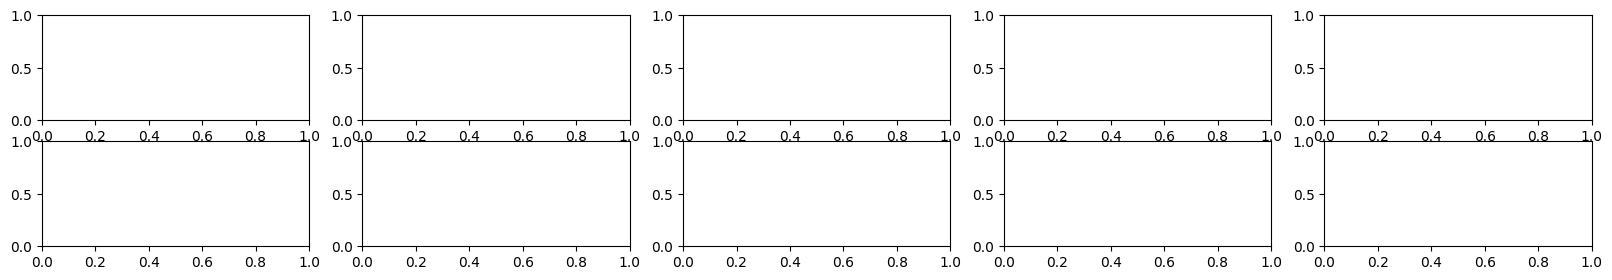

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(20, 3))
for i in range(2):
    for j in range(5):
        plot_2d_image([2,5,5*i+j+1], acquired_data[5*i+j].as_array()[0,0], "data")